<a href="https://colab.research.google.com/github/vanessasheila/data_science/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Business/Project Understanding

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, perlu mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian  menyarankan negara mana saja  yang paling perlu menjadi fokus CEO

## 2. The Data



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### 2.1 Dataset Understanding
*   Terdapat 10 feature <br>
Negara : Nama negara  <br>
Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran <br>
Ekspor : Ekspor barang dan jasa perkapita <br>
Kesehatan: Total pengeluaran kesehatan perkapita <br>
Impor: Impor barang dan jasa perkapita <br>
Pendapatan: Penghasilan bersih perorang <br>
Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP  <br>
Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama <br>
Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama <br>
GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.  <br>

*   data terdiri dari 167 baris

### 2.2 EDA Part 1
Multivariate analysis menggunakan scatter plot pada dataset untuk melihat sekilas antar fitur dataset.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52db657df0>,
      dtype=object)

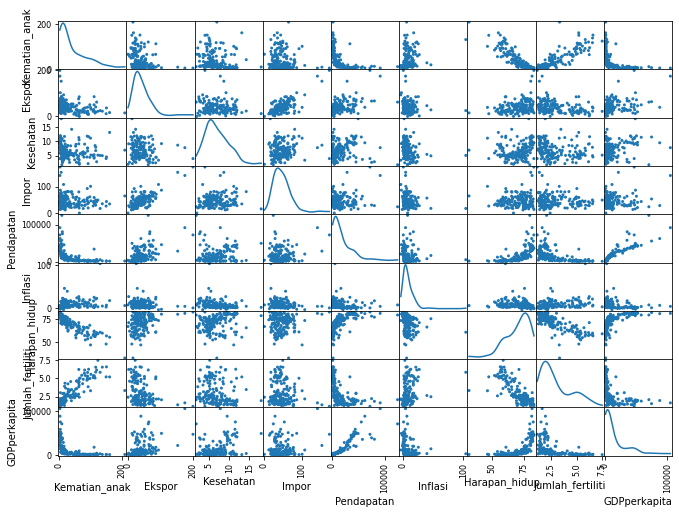

In [ ]:
pd.plotting.scatter_matrix(df.loc[:,"Kematian_anak":"GDPperkapita"],alpha=1,diagonal='kde',figsize=(11,8))

###2.3 Feature Selection
* Berdasarkan plot dari scatter plot dan menganalisis hubungan antar fitur, saya memilih 2 fitur yaitu pendapatan dan GDPperkapita
* Karena pada grafik sebaran data fitur pendapatan dan GDPperkapita cenderung naik yaitu jika pendapatan tinggi, maka GDPperkapita juga akan tinggi. Sehingga korelasi antar kedua fitur tersebut positif. Dan jika menggunakan fungsi corr() korelasi antara kedua fitur tersebut juga paling tinggi


In [ ]:
df.corr()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Kematian_anak,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
Ekspor,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
Kesehatan,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
Impor,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
Pendapatan,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
Inflasi,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
Harapan_hidup,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
Jumlah_fertiliti,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
GDPperkapita,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


### 2.4 Data Cleaning

    

1. missing value

In [ ]:
#1. missing Value
print("Jumlah Missing Value pada fitur pendapatan =",df['Pendapatan'].isnull().sum())
print("Jumlah Missing Value pada fitur GDPperkapita =",df['GDPperkapita'].isnull().sum())

Jumlah Missing Value pada fitur pendapatan = 0
Jumlah Missing Value pada fitur GDPperkapita = 0


Tidak terdapat missing value


2. Outlier


* Fitur Pendapatan

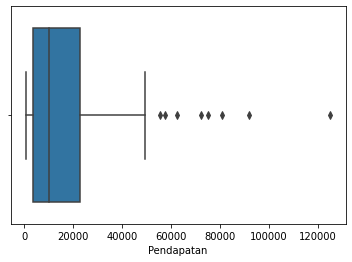

In [ ]:
#2 Outlier
sns.boxplot(x='Pendapatan', data=df)

In [ ]:
#Mencari Interquartil untuk mendapatkan batas bawah dan batas atas
Q1 = df['Pendapatan'].quantile(0.25)
Q3 = df['Pendapatan'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
print(lower_bound,upper_bound)

-25812.5 51967.5


In [ ]:
#Mengubah nilai outlier dengan batas bawah maupun batas atas
df['Pendapatan'] = np.where(df['Pendapatan']<lower_bound, lower_bound, df['Pendapatan'])
df['Pendapatan'] = np.where(df['Pendapatan']>upper_bound, upper_bound, df['Pendapatan'])

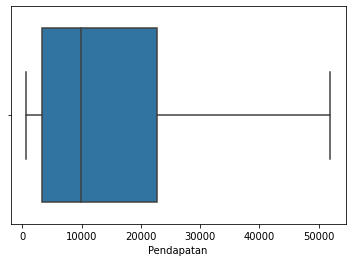

In [ ]:
sns.boxplot(x='Pendapatan', data=df)

* Fitur GDPperkapita

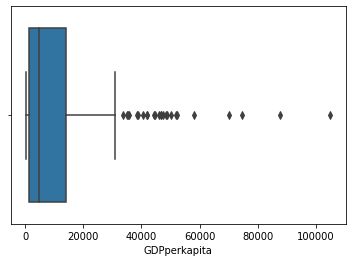

In [ ]:
sns.boxplot(x='GDPperkapita', data=df)

In [ ]:
#Mencari Interquartil untuk mendapatkan batas bawah dan batas atas
Q1 = df['GDPperkapita'].quantile(0.25)
Q3 = df['GDPperkapita'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
print(lower_bound,upper_bound)

-17750.0 33130.0


In [ ]:
#Mengubah nilai outlier dengan batas bawah maupun batas atas
df['GDPperkapita'] = np.where(df['GDPperkapita']<lower_bound, lower_bound, df['GDPperkapita'])
df['GDPperkapita'] = np.where(df['GDPperkapita']>upper_bound, upper_bound, df['GDPperkapita'])

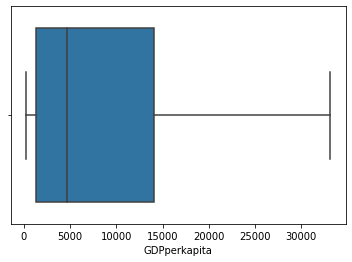

In [ ]:
sns.boxplot(x='GDPperkapita', data=df)

Pada kedua fitur memiliki beberapa nilai outlier atau nilai yang melebihi batas bawah maupun batas atas. cara menangani nya adalah dengan mengubah nilai yang melebihi batas bawah maupun dengan batas atas tersebut dengan nilai batas bawah dan batas atas itu sendiri

### 2.5 EDA Part 2

* Univariate Analysis

* Bivariate Analysis

## 3. Clustering

1. scale the data

In [ ]:
X = df[['Pendapatan','GDPperkapita']]

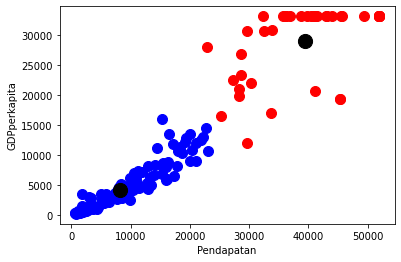

In [ ]:
kmeans1 = KMeans(n_clusters=2,random_state=42).fit(X)
labels1 = kmeans1.labels_
new_X = pd.DataFrame(data=X, columns = ['Pendapatan','GDPperkapita'])
new_X['label_kmeans1'] = labels1

plt.scatter(new_X.Pendapatan[new_X.label_kmeans1 == 0], new_X['GDPperkapita'][new_X.label_kmeans1 == 0],c='blue',s=100,linestyle='-')
plt.scatter(new_X.Pendapatan[new_X.label_kmeans1 == 1], new_X['GDPperkapita'][new_X.label_kmeans1 == 1],c='red',s=100,linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200)
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

2. Decide the number of clusters 
- THE ELBOW METHOD

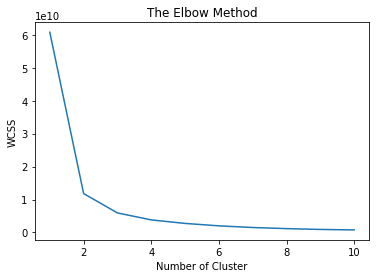

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++',random_state=42)
  kmeans.fit(new_X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

3. Do clustering with the decided amount of cluster. cluster = 3
4. Create the clustering result graph.

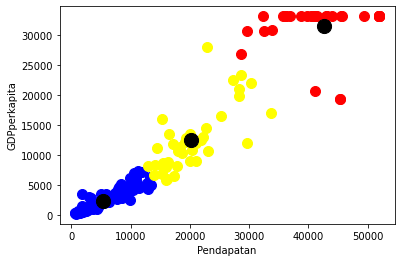

In [ ]:
kmeans2 = KMeans(n_clusters=3,random_state=42).fit(X)
labels2 = kmeans2.labels_
new_X = pd.DataFrame(data=X, columns = ['Pendapatan','GDPperkapita'])
new_X['label_kmeans2'] = labels2


plt.scatter(new_X.Pendapatan[new_X.label_kmeans2 == 0], new_X['GDPperkapita'][new_X.label_kmeans2 == 0],c='blue',s=100,linestyle='-')
plt.scatter(new_X.Pendapatan[new_X.label_kmeans2 == 1], new_X['GDPperkapita'][new_X.label_kmeans2 == 1],c='red',s=100,linestyle='-')
plt.scatter(new_X.Pendapatan[new_X.label_kmeans2 == 2], new_X['GDPperkapita'][new_X.label_kmeans2 == 2],c='yellow',s=100,linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200)
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

##4. Recommendation

1. Choose which country cluster to focus. 
<br>
Cluster negara yang dipilih adalah cluster negara dengan pendapatan dan GDPperkapita yang minim
<br>
2. Show which countries included in that cluster.
<br>
* Afghanistan
* Albania
* Angola
* Armenia
* Bangladesh
<br>
3. Among those countries, choose the best coutries to receive help
negara terbaik yang membutuhkan bantuan adalah negara yang memiliki pendapatan dan GDPperkapita PALING kecil yaitu Negara Congo dan Burundi
<br>

In [ ]:
#2 
country = df[['Negara','Pendapatan','GDPperkapita']]
country = country[(country['Pendapatan']<10000)&(country['GDPperkapita']<5000)]
country.head(5)

,Negara,Pendapatan,GDPperkapita
0,Afghanistan,1610,553
1,Albania,9930,4090
3,Angola,5900,3530
6,Armenia,6700,3220
12,Bangladesh,2440,758


In [ ]:
#3
best_country = df[['Negara','Pendapatan','GDPperkapita']]
print(best_country[best_country.Pendapatan == best_country.Pendapatan.min()])
print(best_country[best_country.GDPperkapita == best_country.GDPperkapita.min()])

              Negara  Pendapatan  GDPperkapita
37  Congo, Dem. Rep.         609           334
     Negara  Pendapatan  GDPperkapita
26  Burundi         764           231
